In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates
from numpy.lib.arraysetops import setxor1d
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/UCI Conference/Dataset2/ocCovidCount.csv', index_col='date', parse_dates=True)
#df = pd.read_csv('/content/drive/MyDrive/UCI Conference/ocCovidCountDataset/ocCovidCount.csv')
#df["date"] = pd.to_datetime(df["date"])
df.sort_values(by='date', ascending = True, inplace = True)
N = 3186989
df['Infective'] = df['Infective'].div(N)
df.head(60)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Infective
date,
2020-01-22,3.137758e-07
2020-01-23,0.000000e+00
2020-01-24,0.000000e+00
2020-01-25,0.000000e+00
2020-01-26,0.000000e+00
2020-01-27,0.000000e+00
2020-01-28,0.000000e+00
2020-01-29,0.000000e+00
2020-01-30,0.000000e+00


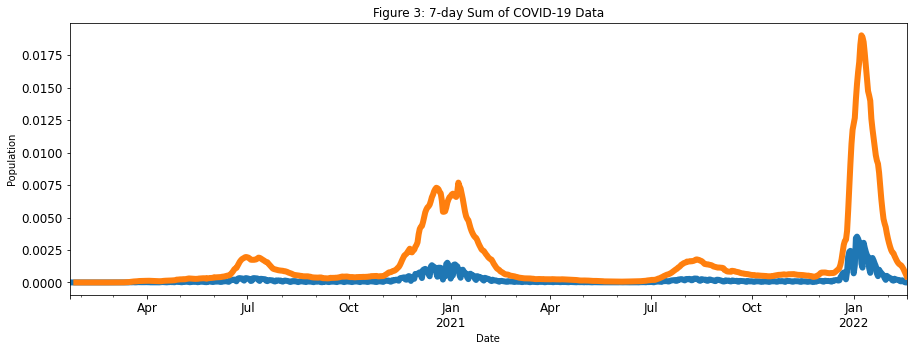

In [ ]:
df['Infective'].plot(figsize=(5,1), lw=6)
df['Infective'].rolling(window=7).sum().plot(figsize=(15,5), lw=6, title='Figure 3: 7-day Sum of COVID-19 Data', ylabel='Population', xlabel='Date', fontsize=12)
#df['Infective'].rolling(window=28).sum().plot(figsize=(15,5))


In [ ]:
df['7-day Sum'] = df['Infective'].rolling(window=7).sum()
df['28-day Sum'] = df['Infective'].rolling(window=28).sum()
#df.head(60)



In [ ]:
df.to_csv('/content/drive/MyDrive/UCI Conference/Dataset2/oc_covid_countSummed.csv')

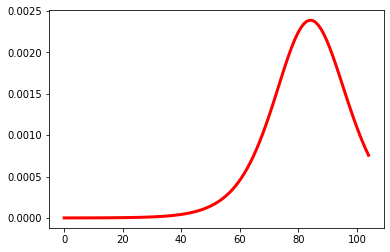

In [ ]:
S = None
I = None
R = None
def odes(x, t):
#WAVE 1 Constants (104):
#a = 1.8
#k = 1.677
#WAVE 2 Constants (52):
#a = 2.6
#k = 2.285
#WAVE 3 Constants (104):
#a = 1.82
#k = 1.702
#WAVE 4 Constants (24):
#a = 4.35
#k = 3.52

  #constants
  a = 1.8
  k = 1.677
  #assign each ODE to a vector element
  S = x[0]
  I = x[1]
  R = x[2]
  #define each ODE
  dSdt = -a*S*I
  dIdt = a*S*I - k*I
  dRdt = k*I
  return [dSdt, dIdt, dRdt]
#initial conditions
I0 = 1/N
S0 = 1. - I0
R0 = 0.
x0 = [S0, I0, R0]
#declare a time vector (time window)
t = np.linspace(0, 104, num=104)
#t = matplotlib.dates.date2num(df['date'])
x = odeint(odes, x0, t)

S = x[:,0]
I = x[:,1]
R = x[:,2]

sevenDaySum = df['7-day Sum'].to_numpy().copy()

#plt.plot(t, S, 'g', lw=3, label='Suseptible')
plt.plot(t, I, 'r', lw=3, label='Infective')
#plt.plot(t, sevenDaySum)
#plt.plot(t, R, 'b', lw=3, label='Removed')
plt.show()

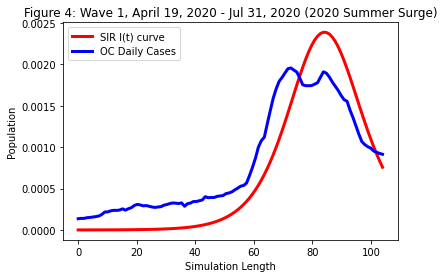

In [ ]:
wave1 = pd.read_csv('/content/drive/MyDrive/UCI Conference/Dataset2/Waves/wave1Sum7.csv')

plt.plot(t, I, 'r', lw=3, label='SIR I(t) curve')
plt.plot(t, wave1['dailyCases'], 'b', lw=3, label='OC Daily Cases')
plt.title('Figure 4: Wave 1, April 19, 2020 - Jul 31, 2020 (2020 Summer Surge)')
plt.ylabel('Population')
plt.xlabel('Simulation Length')
plt.legend()

In [ ]:
wave1.head(105)

,date,dailyCases
0,2020-04-19,0.000136
1,2020-04-20,0.000140
2,2020-04-21,0.000140
3,2020-04-22,0.000148
4,2020-04-23,0.000151
...,...,...
99,2020-07-27,0.000989
100,2020-07-28,0.000954
101,2020-07-29,0.000939
102,2020-07-30,0.000924
